# OOI cgsn-parsers -- Example 1, metbk
NOTE: I think much of this machinery could be replaced with a simpler approach using pandas `read_csv` and a mapper definition of columns: variable name, column index, and units string. Test out that approach later. (that mapper definitions could be stored in one or more JSON files on github!)  
Emilio Mayorga   
5/22/2016

In [1]:
%matplotlib inline
import requests
import pandas as pd

/home/mayorga/miniconda/envs/uwapl_em_mc_1aui/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import sys
sys.path.insert(0, '/usr/mayorgadat/workmain/APL/DataSources/OOI/ooici/cgsn-parsers/parsers')

from parse_metbk import Parser as Parser_metbk

In [3]:
baseurl = "https://rawdata.oceanobservatories.org/files/CE07SHSM/D00003/cg_data/dcl11/metbk/"

In [4]:
fname = "20160522.metbk.log"

In [5]:
# initialize the Parser object for METBK
metbk = Parser_metbk(baseurl + fname)

In [6]:
# verify=False added b/c certificate is expired
r = requests.get(metbk.infile, verify=False)
metbk.raw = r.content.splitlines()

/home/mayorga/miniconda/envs/uwapl_em_mc_1aui/lib/python2.7/site-packages/requests/packages/urllib3/connectionpool.py:821: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.org/en/latest/security.html
  InsecureRequestWarning)


In [7]:
len(metbk.raw), metbk.raw[-5:]

(1440,
 ['2016/05/22 23:56:00.457 1013.15  74.776  13.323  311.8    6.87  13.203  3.7388  625.9    1.66    3.77  3.7388 12.50',
  '2016/05/22 23:57:05.587 1013.15  74.341  13.270  311.4    6.85  13.212  3.7389  632.8    1.26    4.14  3.7389 12.50',
  '2016/05/22 23:57:39.121 1013.22  74.739  13.270  313.4    6.85  13.192  3.7373  601.1    1.70    4.15  3.7373 12.50',
  '2016/05/22 23:58:43.347 1013.22  75.668  13.247  313.4    6.82  13.198  3.7379  434.4    1.86    4.09  3.7379 12.50',
  '2016/05/22 23:59:47.594 1013.22  75.646  13.194  313.4    6.85  13.193  3.7373  429.5    1.80    4.13  3.7373 12.50'])

In [8]:
metbk.parse_data()

In [10]:
metbk.data.keys()

['longwave_irradiance',
 'eastward_wind_velocity',
 'sea_surface_conductivity',
 'dcl_date_time_string',
 'shortwave_irradiance',
 'time',
 'northward_wind_velocity',
 'precipitation_level',
 'relative_humidity',
 'air_temperature',
 'sea_surface_temperature',
 'barometric_pressure']

In [11]:
df = pd.DataFrame(metbk.data)
df['dt_utc'] = pd.to_datetime(df.dcl_date_time_string, utc=True)
df.set_index('dt_utc', drop=False, inplace=True)

In [12]:
# Later, can drop time, dcl_date_time_string, and maybe dt_utc (not the index)
df.shape, df.columns

((1440, 13),
 Index([u'air_temperature', u'barometric_pressure', u'dcl_date_time_string',
        u'eastward_wind_velocity', u'longwave_irradiance',
        u'northward_wind_velocity', u'precipitation_level',
        u'relative_humidity', u'sea_surface_conductivity',
        u'sea_surface_temperature', u'shortwave_irradiance', u'time',
        u'dt_utc'],
       dtype='object'))

In [13]:
df.dtypes

air_temperature                    float64
barometric_pressure                float64
dcl_date_time_string                object
eastward_wind_velocity             float64
longwave_irradiance                float64
northward_wind_velocity            float64
precipitation_level                float64
relative_humidity                  float64
sea_surface_conductivity           float64
sea_surface_temperature            float64
shortwave_irradiance               float64
time                               float64
dt_utc                      datetime64[ns]
dtype: object

In [14]:
df.tail(10)

,air_temperature,barometric_pressure,dcl_date_time_string,eastward_wind_velocity,longwave_irradiance,northward_wind_velocity,precipitation_level,relative_humidity,sea_surface_conductivity,sea_surface_temperature,shortwave_irradiance,time,dt_utc
dt_utc,,,,,,,,,,,,,
2016-05-22 23:50:39.125,13.201,1013.29,2016/05/22 23:50:39.125,1.80,324.5,3.79,6.82,75.741,3.7451,13.277,624.9,1.463961e+09,2016-05-22 23:50:39.125
2016-05-22 23:51:43.412,13.201,1013.29,2016/05/22 23:51:43.412,2.53,320.4,4.40,6.85,74.223,3.7462,13.297,671.4,1.463961e+09,2016-05-22 23:51:43.412
2016-05-22 23:52:47.648,13.232,1013.36,2016/05/22 23:52:47.648,2.15,318.3,4.28,6.84,73.810,3.7437,13.269,654.0,1.463961e+09,2016-05-22 23:52:47.648
2016-05-22 23:53:51.886,13.224,1013.29,2016/05/22 23:53:51.886,2.36,315.7,3.97,6.85,73.427,3.7411,13.229,641.9,1.463961e+09,2016-05-22 23:53:51.886
2016-05-22 23:54:56.113,13.254,1013.29,2016/05/22 23:54:56.113,2.58,314.2,4.02,6.86,73.036,3.7399,13.219,640.8,1.463961e+09,2016-05-22 23:54:56.113
2016-05-22 23:56:00.457,13.323,1013.15,2016/05/22 23:56:00.457,1.66,311.8,3.77,6.87,74.776,3.7388,13.203,625.9,1.463961e+09,2016-05-22 23:56:00.457
2016-05-22 23:57:05.587,13.270,1013.15,2016/05/22 23:57:05.587,1.26,311.4,4.14,6.85,74.341,3.7389,13.212,632.8,1.463961e+09,2016-05-22 23:57:05.587
2016-05-22 23:57:39.121,13.270,1013.22,2016/05/22 23:57:39.121,1.70,313.4,4.15,6.85,74.739,3.7373,13.192,601.1,1.463961e+09,2016-05-22 23:57:39.121
2016-05-22 23:58:43.347,13.247,1013.22,2016/05/22 23:58:43.347,1.86,313.4,4.09,6.82,75.668,3.7379,13.198,434.4,1.463962e+09,2016-05-22 23:58:43.347


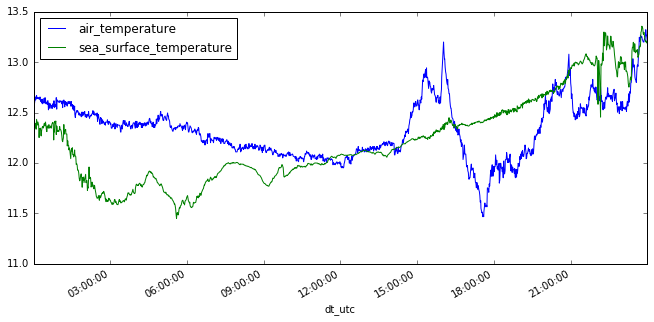

In [15]:
df[['air_temperature', 'sea_surface_temperature']].plot(figsize=(11,5));

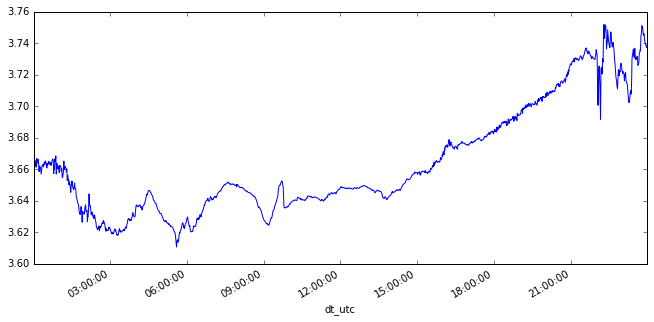

In [17]:
df['sea_surface_conductivity'].plot(figsize=(11,5));